# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

warnings.filterwarnings("ignore")

In [3]:
rawData = pd.DataFrame(pd.read_csv('./heart_cleveland_upload.csv'))
rawData.shape

(297, 14)

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
rawData.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [6]:
rawData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
rawData.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

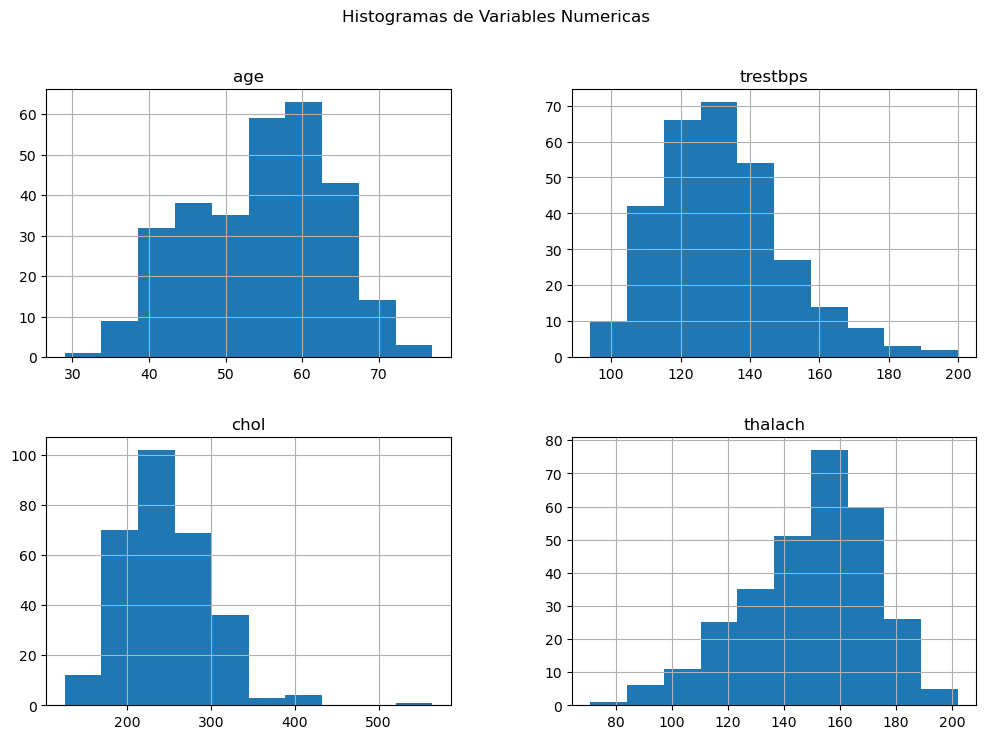

In [18]:
num_vars = ['age', 'trestbps', 'chol', 'thalach']
rawData[num_vars].hist(figsize=(12, 8))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

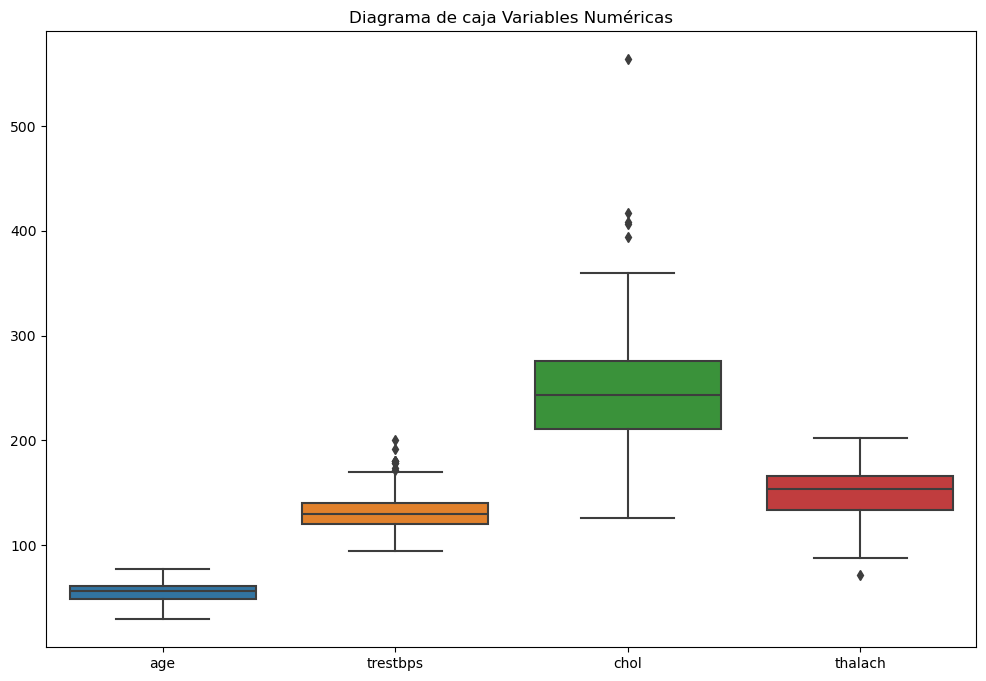

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=rawData[num_vars])
plt.title('Diagrama de caja Variables Numéricas')
plt.show()

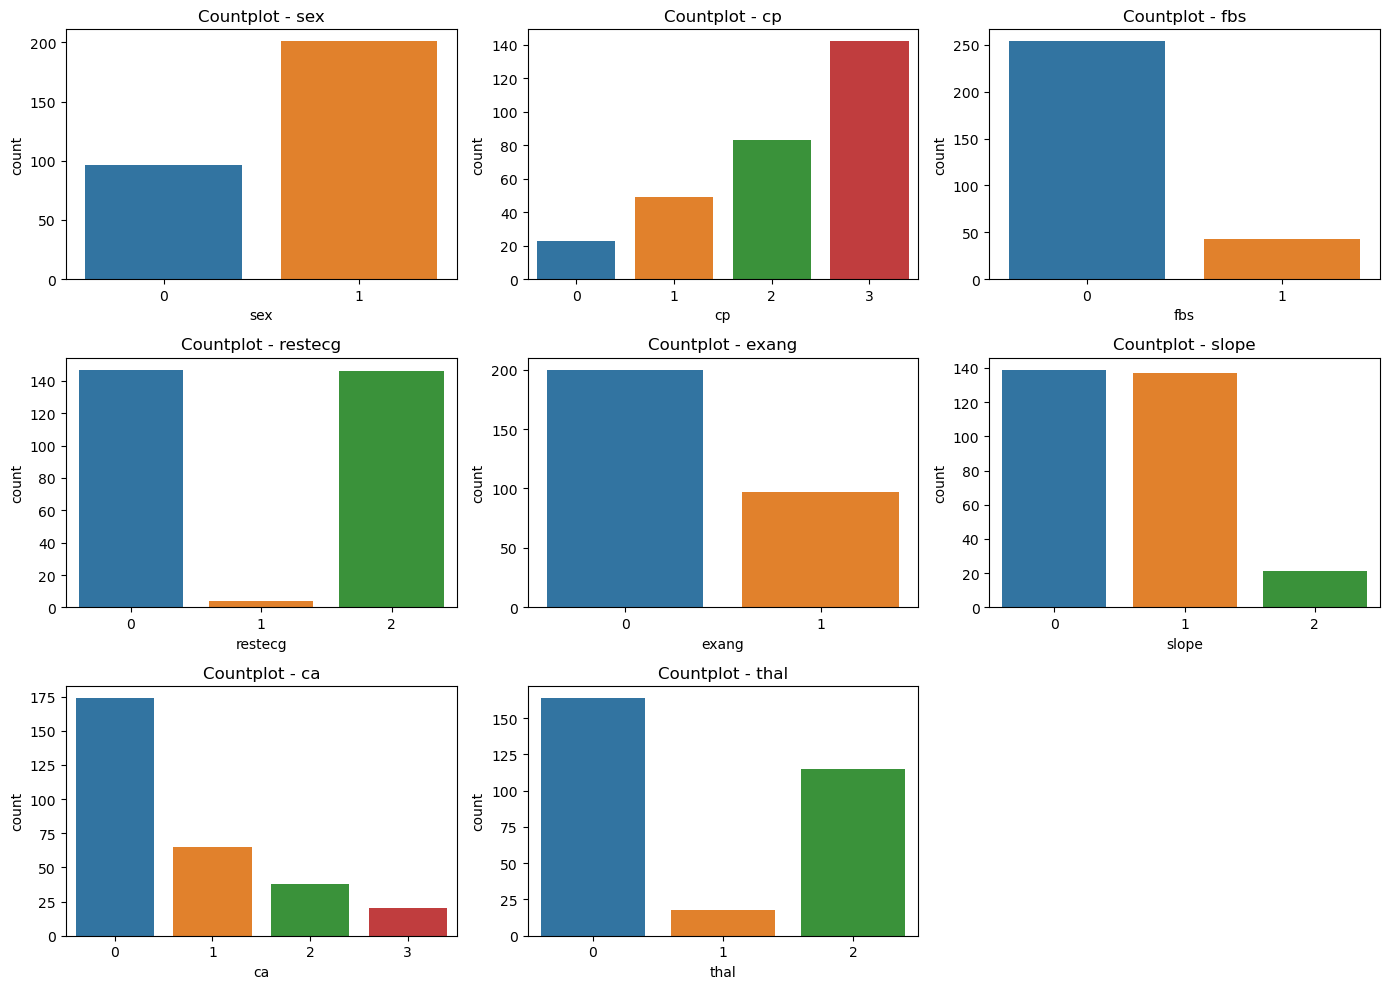

In [21]:
cat_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(14, 10))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=rawData)
    plt.title(f'Countplot - {var}')
plt.tight_layout()
plt.show()

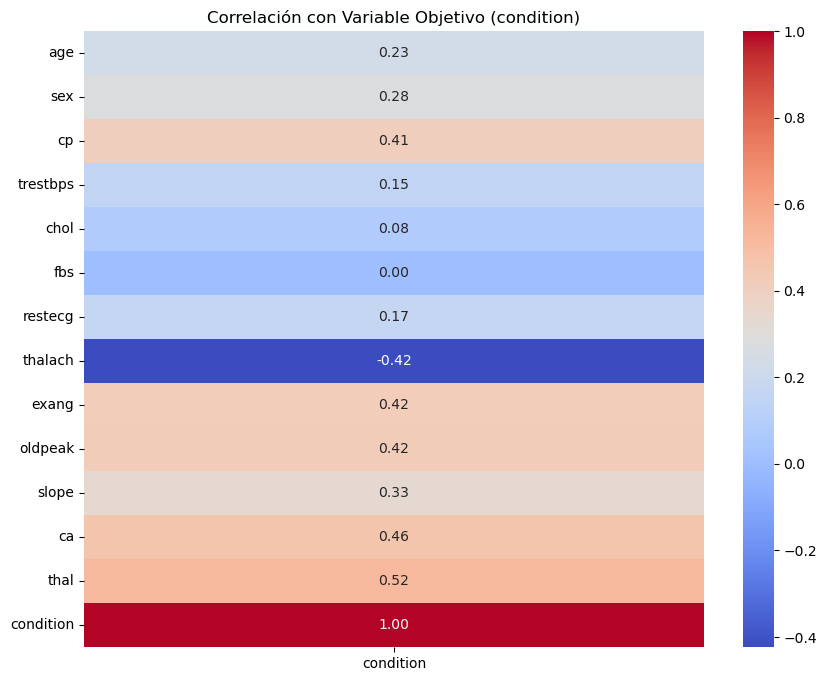

In [22]:
correlation_matrix = rawData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['condition']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación con Variable Objetivo (condition)')
plt.show()

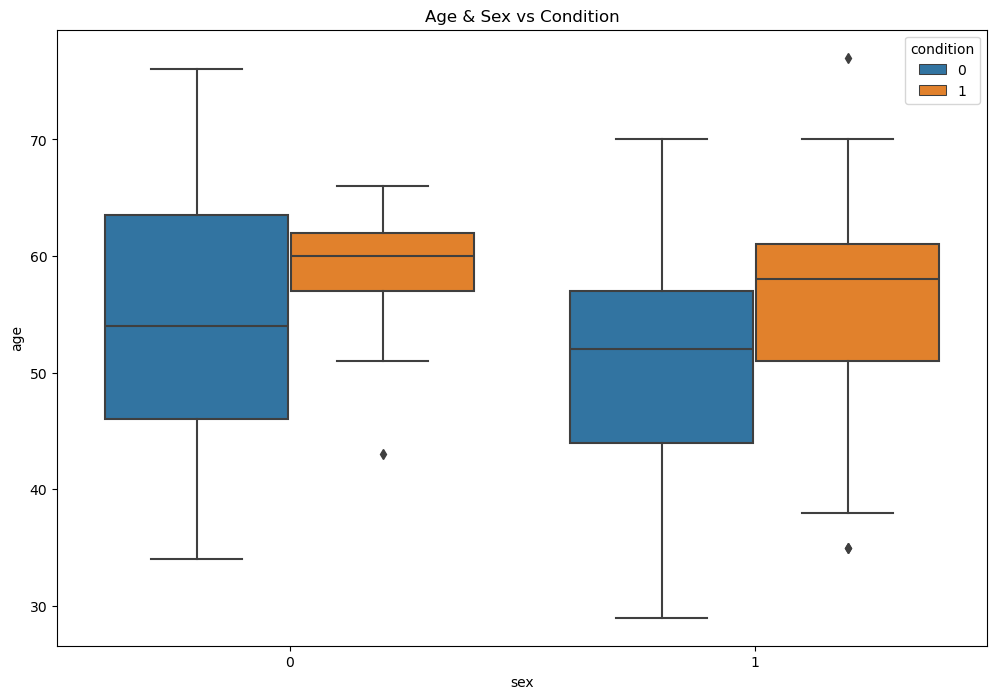

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='age', hue='condition', data=rawData)
plt.title('Age & Sex vs Condition')
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [35]:
rawData.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [37]:
carData = rawData.copy()
carData.dropna(inplace=True)

# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

### Característica de interes

- **Condition**: Si la persona tiene problemas del corazón o no (0 = no tiene problemas - 1 = si tiene problemas)
- **Predecir** si una persona puede tener problemas del corazón


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [29]:

X = carData.drop('condition', axis=1)  
y = carData['condition']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [39]:
# Desempeño del modelo de regresión
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.86      0.70      0.78        27

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

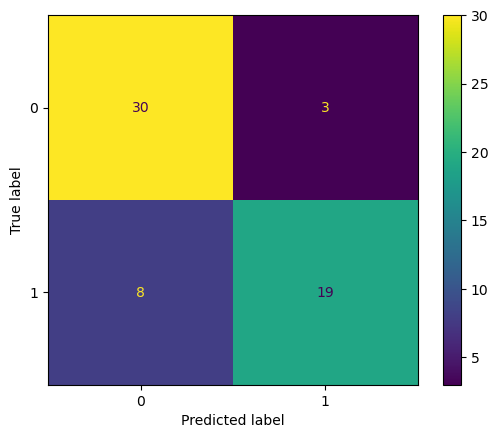

In [43]:
#Matriz de Confusión del modelo
cm=confusion_matrix(y_test,y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

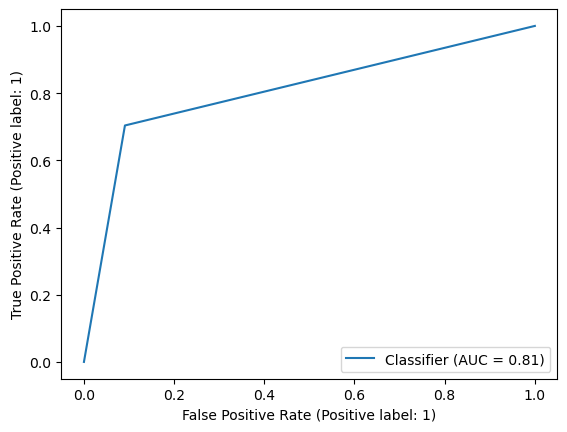

In [45]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos

- **Precision:** Para condition = 0, la precisión es del 79%, lo que indica que el 79% de las instancias clasificadas como no teniendo problemas cardíacos realmente no los tienen. Para condition = 1, la precisión es del 86%, lo que indica que el 86% de las instancias clasificadas como teniendo problemas cardíacos realmente los tienen.
- **Recall:** Para condition = 0, el recall es del 91%, lo que indica que el 91% de las instancias que realmente no tienen problemas cardíacos se identificaron correctamente. Para condition = 1, el recall es del 70%, lo que indica que el 70% de las instancias que realmente tienen problemas cardíacos se identificaron correctamente.
- **F-1 Score:** Para condition = 0, el puntaje F1 es 0.85. Esto significa que el modelo tiene una buena precisión y recall para predecir correctamente los casos donde una persona no tiene problemas cardíacos. Para la contidion = 1, el puntaje F1 es 0.78. Esto indica que el modelo tiene una precisión y recall aceptables para predecir los casos donde una persona tiene problemas cardíacos, pero podría haber margen de mejora.

- **Accuracy:** La precisión general del modelo es del 82%, lo que indica que el 82% de las predicciones son correctas.

- **Matriz de Confusión:**
    - El modelo clasificó correctamente 30 instancias que realmente no tenían problemas cardíacos (verdaderos negativos).
    - El modelo clasificó correctamente 19 instancias que realmente tenían problemas cardíacos (verdaderos positivos).
    - El modelo clasificó incorrectamente 3 instancias como teniendo problemas cardíacos cuando en realidad no los tenían (falsos positivos).
    - El modelo clasificó incorrectamente 9 instancias como no teniendo problemas cardíacos cuando en realidad los tenían (falsos negativos).